In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('credit_card_fraud_10k.csv')

In [3]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [4]:
df.columns

Index(['transaction_id', 'amount', 'transaction_hour', 'merchant_category',
       'foreign_transaction', 'location_mismatch', 'device_trust_score',
       'velocity_last_24h', 'cardholder_age', 'is_fraud'],
      dtype='object')

In [5]:
df.shape

(10000, 10)

In [6]:
df.isnull().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [9]:
df.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [10]:
category = df['merchant_category'].unique().tolist()

In [11]:
category

['Electronics', 'Travel', 'Grocery', 'Food', 'Clothing']

In [12]:
amount_category_sum = df.groupby("merchant_category")["amount"].sum()
amount_category_sum

merchant_category
Clothing       360831.73
Electronics    343459.45
Food           363830.85
Grocery        343552.61
Travel         347823.85
Name: amount, dtype: float64

In [13]:
type(amount_category_sum)

pandas.core.series.Series

<Axes: xlabel='merchant_category', ylabel='amount'>

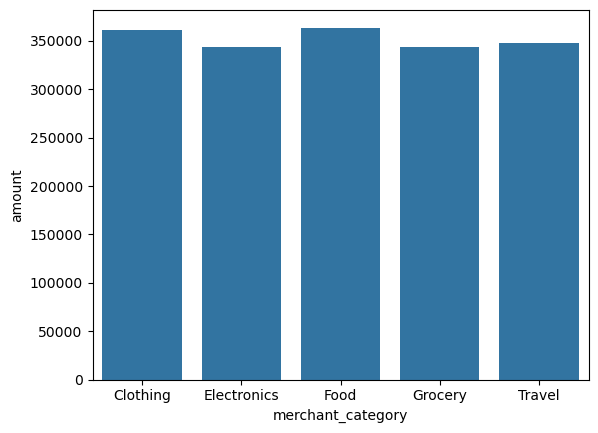

In [14]:
sns.barplot(data=amount_category_sum)

In [15]:
foreign_transaction = df.loc[df['foreign_transaction'] == 1, 'foreign_transaction'].count()

In [16]:
foreign_transaction

978

In [17]:
domestic_transaction = df.loc[df['foreign_transaction'] == 0, 'foreign_transaction'].count()

In [18]:
domestic_transaction

9022

In [19]:
location_of_transaction = {"Foreign":foreign_transaction, "Domestic":domestic_transaction}

In [20]:
location_of_transaction

{'Foreign': 978, 'Domestic': 9022}

Text(0.5, 1.0, 'Foreign VS Domestic Credit Card Transaction')

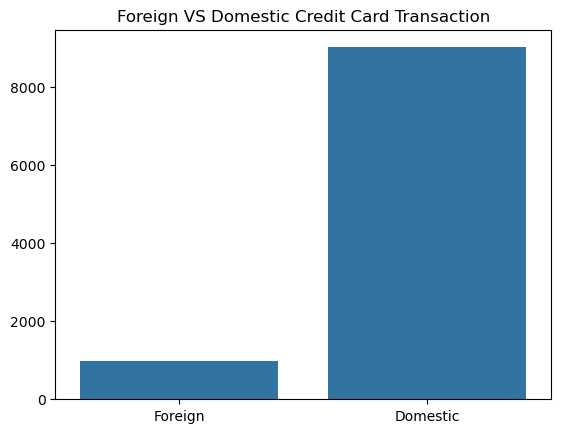

In [21]:
sns.barplot(data=location_of_transaction)
plt.title("Foreign VS Domestic Credit Card Transaction")

In [22]:
amount_foriegn_sum = df.loc[df['foreign_transaction'] == 1, 'amount'].sum()

In [23]:
amount_foriegn_sum

174211.85

In [24]:
amount_domestic_sum = df.loc[df['foreign_transaction'] == 0, 'amount'].sum()

In [25]:
amount_domestic_sum

1585286.6400000001

In [26]:
foreign_loc_mismatch = df.query("foreign_transaction == 1 and location_mismatch == 1").shape[0]

In [27]:
foreign_loc_mismatch

85

In [28]:
domestic_loc_mismatch = df.query("foreign_transaction == 0 and location_mismatch == 1").shape[0]

In [29]:
domestic_loc_mismatch

772

In [30]:
loc_mismatch = {
    "Foreign"  : foreign_loc_mismatch,
    "Domestic" : domestic_loc_mismatch
}

Text(0.5, 1.0, 'Location Mismatch Foreign VS Domestic')

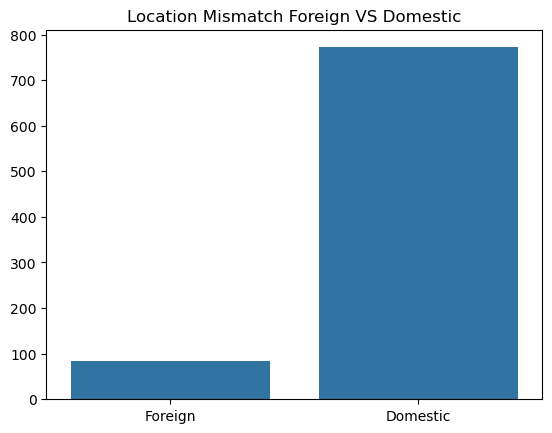

In [33]:
sns.barplot(data=loc_mismatch)
plt.title("Location Mismatch Foreign VS Domestic")